In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import string
import os


SEED = 123
np.random.seed(SEED)

In [2]:
def load_reviews(file_name):
    f = open(file_name) 
    data = json.load(f)

    df_list = []
    for restaurant, reviews in data.items():
        normalized_df = pd.json_normalize(reviews)
        normalized_df['restaurant'] = restaurant
        df_list.append(normalized_df)

    return pd.concat(df_list, ignore_index=True)

reviews = []
path = "{}/reviews".format(os.getcwd())
for file_name in os.listdir(path):
    with open(path+'/'+file_name, "r") as json_file:
        reviews.append(load_reviews(path+'/'+file_name))
df_reviews = pd.concat(reviews, ignore_index=True)
    


In [3]:
df_reviews['photoCount'].fillna(0,inplace=True)
df_reviews.drop_duplicates()
df_reviews

,photoCount,reviewCount,eliteYear,localizedDate,rating,comment.text,comment.language,restaurant
0,1012.0,321.0,NaN,11/2/2018,5.0,*Tartinery is one of the food vendors at Hudso...,en,tartinery-new-york-15
1,190.0,1421.0,NaN,8/6/2023,3.0,Overall the service is very slow. We ordered 2...,en,tartinery-new-york-15
2,117.0,294.0,2023.0,10/17/2022,4.0,Yum I love a place that has interesting drinks...,en,tartinery-new-york-15
3,154.0,171.0,2023.0,11/29/2021,5.0,I always look for a comfortable go to bar/rest...,en,tartinery-new-york-15
4,6668.0,2143.0,2023.0,4/6/2022,3.0,Tartinery is where you go for happy hour wine ...,en,tartinery-new-york-15
...,...,...,...,...,...,...,...,...
331688,301.0,77.0,2023.0,5/21/2022,4.0,Great brunch spot. Cute decor. The coffee was ...,en,brownstone-pancake-factory-edgewater
331689,324.0,114.0,2023.0,10/1/2022,4.0,An &#34;All American Dinner&#34; that is affor...,en,brownstone-pancake-factory-edgewater
331690,24.0,10.0,NaN,9/10/2023,5.0,Went today and got the triple d buffalo chicke...,en,brownstone-pancake-factory-edgewater
331691,5.0,35.0,NaN,5/7/2023,5.0,We came to Brownstone as a group of 30 on a bu...,en,brownstone-pancake-factory-edgewater


In [4]:
df_reviews_stat = df_reviews[['restaurant', 'photoCount']].groupby('restaurant').count().rename(columns={'photoCount':'reviews_cnt'})
df_reviews_stat['elite_reviews_cnt'] = df_reviews[['restaurant', 'eliteYear']].groupby('restaurant').count()['eliteYear']
df_reviews_stat['elite_reviews_perc'] = df_reviews_stat['elite_reviews_cnt']/df_reviews_stat['reviews_cnt']
df_reviews_stat['user_photo_cnt_avg'] = df_reviews[['restaurant', 'photoCount']].groupby('restaurant').mean()['photoCount']
df_reviews_stat['user_review_cnt_avg'] = df_reviews[['restaurant', 'reviewCount']].groupby('restaurant').mean()['reviewCount']
df_reviews_stat['rating_avg'] = df_reviews[['restaurant', 'rating']].groupby('restaurant').mean()['rating']
df_reviews_stat['rating_med'] = df_reviews[['restaurant', 'rating']].groupby('restaurant').median()['rating']
df_reviews_stat['rating_std'] = df_reviews[['restaurant', 'rating']].groupby('restaurant').std()['rating']
df_reviews_stat
# df_reviews[['photoCount','reviewCount','eliteYear','rating','restaurant']].groupby('restaurant').aggregate([np.mean])

,reviews_cnt,elite_reviews_cnt,elite_reviews_perc,user_photo_cnt_avg,user_review_cnt_avg,rating_avg,rating_med,rating_std
restaurant,,,,,,,,
1-bite-mediterranean-new-york,17,1,0.058824,36.176471,134.588235,3.058824,3.0,1.344925
1-chimi-sushi-new-york,15,2,0.133333,1983.400000,525.933333,2.933333,3.0,1.533747
1-columbia-deli-new-york,5,0,0.000000,2.800000,9.200000,1.800000,1.0,1.788854
1-dollar-pizza-new-york,50,14,0.280000,816.540000,304.920000,3.440000,4.0,1.514016
1-minute-cafe-new-york-2,1,0,0.000000,0.000000,8.000000,2.000000,2.0,NaN
...,...,...,...,...,...,...,...,...
zzs-clam-bar-new-york,50,10,0.200000,633.340000,315.660000,4.260000,5.0,1.157231
çka-ka-qëllu-new-york-3,50,30,0.600000,740.680000,264.520000,4.520000,5.0,0.762381
épicerie-boulud-new-york-6,50,22,0.440000,910.640000,348.120000,3.760000,4.0,1.238168


In [5]:
def load_restaurant_data(file_name):
    f = open(file_name) 
    data = json.load(f)
    df_list = []
    for restaurant, info in data.items():
        normalized_df = pd.json_normalize(info)
        normalized_df['restaurant'] = restaurant
        df_list.append(normalized_df)

    # Concatenate all dataframes
    df_restaurants = pd.concat(df_list, ignore_index=True)
    return flatten_category(df_restaurants)


def extract_titles(row):
    # Extracting 'title' from each column if it is not None, otherwise using None
    return [row[i]['title'] if row[i] is not None else None for i in range(len(row))]

def flatten_category(df):
    new_category = pd.json_normalize(df['categories'])
    category_df = new_category.apply(extract_titles, axis=1, result_type='expand')

    # Renaming the columns
    category_df.columns = [f'category_{i}' for i in range(new_category.shape[1])]

    # Concatenate with the original dataframe if needed
    df = pd.concat([df, category_df], axis=1)
    return df


df_restaurants = load_restaurant_data('restaurants.json')
#df_restaurants2 = load_restaurant_data('restaurants2.json')
#df_restaurants = pd.concat([df_restaurants1,df_restaurants2], ignore_index=True)


In [6]:
michelin_dict = json.load(open("michelin_alias.json") )
df_restaurants['is_michelin'] = [1 if i in michelin_dict.values() else 0 for i in df_restaurants['restaurant']]



In [7]:
# exclude 8 brooklyn restaurants
'''
no_data_michelin_list = []
for j in michelin_dict.values():
    exist = 0
    for i in df_restaurants['restaurant']:
        if i == j:
            # print(i, "||", j)
            exist += 1
    if exist == 0:
        no_data_michelin_list.append(j)
no_data_michelin_list
'''

'\nno_data_michelin_list = []\nfor j in michelin_dict.values():\n    exist = 0\n    for i in df_restaurants[\'restaurant\']:\n        if i == j:\n            # print(i, "||", j)\n            exist += 1\n    if exist == 0:\n        no_data_michelin_list.append(j)\nno_data_michelin_list\n'

In [8]:

df_restaurants.head()



,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,location.zip_code,location.country,location.state,location.display_address,restaurant,category_0,category_1,category_2,category_3,is_michelin
0,ce605OMECZ3jLZtk6dCDHA,le-pain-quotidien-new-york-137,Le Pain Quotidien,https://s3-media3.fl.yelpcdn.com/bphoto/z-YqDX...,False,https://www.yelp.com/biz/le-pain-quotidien-new...,84,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",3.0,"[pickup, delivery]",...,10280,US,NY,"[395 S End Ave, New York, NY 10280]",le-pain-quotidien-new-york-137,Coffee & Tea,Bakeries,Breakfast & Brunch,None,0
1,B8yFj4qt-HgMCbF5S-GkgA,creperie-new-york-6,Creperie,https://s3-media1.fl.yelpcdn.com/bphoto/uydGkc...,False,https://www.yelp.com/biz/creperie-new-york-6?a...,19,"[{'alias': 'creperies', 'title': 'Creperies'}]",2.5,[],...,10281,US,NY,"[255 Liberty St, New York, NY 10281]",creperie-new-york-6,Creperies,None,None,None,0
2,WZLhPYaYSFy7M_-Jh1VuNw,dos-toros-taqueria-new-york-5,Dos Toros Taqueria,https://s3-media1.fl.yelpcdn.com/bphoto/fNdfBJ...,False,https://www.yelp.com/biz/dos-toros-taqueria-ne...,132,"[{'alias': 'mexican', 'title': 'Mexican'}]",3.5,[],...,10281,US,NY,"[225 Liberty St, Ste 242, New York, NY 10281]",dos-toros-taqueria-new-york-5,Mexican,None,None,None,0
3,tFQRwk9SVOFgpMBZ55UrLw,umami-burger-new-york-17,Umami Burger,https://s3-media2.fl.yelpcdn.com/bphoto/uvquI3...,False,https://www.yelp.com/biz/umami-burger-new-york...,333,"[{'alias': 'burgers', 'title': 'Burgers'}]",3.0,"[delivery, pickup]",...,10281,US,NY,"[225 Liberty St, Ste 247, New York, NY 10281]",umami-burger-new-york-17,Burgers,None,None,None,0
4,jhs35REmv8Yo9-Z27KQJSA,naya-brookfield-place-new-york-3,NAYA - Brookfield Place,https://s3-media3.fl.yelpcdn.com/bphoto/Zd6LgX...,False,https://www.yelp.com/biz/naya-brookfield-place...,32,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"[pickup, delivery]",...,10281,US,NY,"[225 Liberty St, Fl 2, New York, NY 10281]",naya-brookfield-place-new-york-3,Mediterranean,Lebanese,None,None,0


In [9]:
df_final = pd.merge(df_restaurants, df_reviews_stat, how='inner', on='restaurant')
df_final

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,category_3,is_michelin,reviews_cnt,elite_reviews_cnt,elite_reviews_perc,user_photo_cnt_avg,user_review_cnt_avg,rating_avg,rating_med,rating_std
0,ce605OMECZ3jLZtk6dCDHA,le-pain-quotidien-new-york-137,Le Pain Quotidien,https://s3-media3.fl.yelpcdn.com/bphoto/z-YqDX...,False,https://www.yelp.com/biz/le-pain-quotidien-new...,84,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",3.0,"[pickup, delivery]",...,None,0,50,16,0.320000,755.900000,199.860000,3.320000,4.0,1.531173
1,B8yFj4qt-HgMCbF5S-GkgA,creperie-new-york-6,Creperie,https://s3-media1.fl.yelpcdn.com/bphoto/uydGkc...,False,https://www.yelp.com/biz/creperie-new-york-6?a...,19,"[{'alias': 'creperies', 'title': 'Creperies'}]",2.5,[],...,None,0,19,1,0.052632,654.894737,244.842105,2.631579,2.0,1.300022
2,WZLhPYaYSFy7M_-Jh1VuNw,dos-toros-taqueria-new-york-5,Dos Toros Taqueria,https://s3-media1.fl.yelpcdn.com/bphoto/fNdfBJ...,False,https://www.yelp.com/biz/dos-toros-taqueria-ne...,132,"[{'alias': 'mexican', 'title': 'Mexican'}]",3.5,[],...,None,0,50,24,0.480000,3183.000000,365.740000,4.040000,4.0,1.159873
3,tFQRwk9SVOFgpMBZ55UrLw,umami-burger-new-york-17,Umami Burger,https://s3-media2.fl.yelpcdn.com/bphoto/uvquI3...,False,https://www.yelp.com/biz/umami-burger-new-york...,333,"[{'alias': 'burgers', 'title': 'Burgers'}]",3.0,"[delivery, pickup]",...,None,0,50,34,0.680000,941.800000,424.520000,3.240000,3.5,1.378553
4,jhs35REmv8Yo9-Z27KQJSA,naya-brookfield-place-new-york-3,NAYA - Brookfield Place,https://s3-media3.fl.yelpcdn.com/bphoto/Zd6LgX...,False,https://www.yelp.com/biz/naya-brookfield-place...,32,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"[pickup, delivery]",...,None,0,32,15,0.468750,603.875000,252.406250,4.250000,5.0,1.077632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,J0V2C6wAkHMLD9j7I50_ZQ,sgd-dubu-so-gong-dong-tofu-and-bbq-edgewater-2,SGD Dubu So Gong Dong Tofu & BBQ,https://s3-media3.fl.yelpcdn.com/bphoto/xX4DnY...,False,https://www.yelp.com/biz/sgd-dubu-so-gong-dong...,228,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.0,[delivery],...,None,0,50,28,0.560000,979.220000,312.580000,3.860000,4.0,1.143036
10873,awvl9pC0RW8PT5A3NeLGMg,fuxingmei-sushi-house-edgewater,FuXingMei Sushi House,https://s3-media1.fl.yelpcdn.com/bphoto/ZgikoA...,False,https://www.yelp.com/biz/fuxingmei-sushi-house...,94,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.0,"[delivery, pickup]",...,None,0,50,16,0.320000,609.660000,186.440000,4.000000,4.0,1.195229
10874,JmhZW6euOW_7L3E3v4fpKg,happy-wok-bronx,Happy Wok,,False,https://www.yelp.com/biz/happy-wok-bronx?adjus...,6,"[{'alias': 'chinese', 'title': 'Chinese'}]",2.0,"[delivery, pickup]",...,None,0,6,0,0.000000,1.833333,5.833333,2.166667,1.0,1.834848
10875,S55v4pq633nTz7jbGmrCfg,justins-pizza-bronx,Justin's Pizza,https://s3-media2.fl.yelpcdn.com/bphoto/CH79G2...,False,https://www.yelp.com/biz/justins-pizza-bronx?a...,18,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",2.5,"[delivery, pickup]",...,None,0,18,1,0.055556,3847.222222,312.888889,2.611111,2.0,1.685191


In [43]:
df_final.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'transactions', 'price', 'phone',
       'display_phone', 'distance', 'coordinates.latitude',
       'coordinates.longitude', 'location.address1', 'location.address2',
       'location.address3', 'location.city', 'location.zip_code',
       'location.country', 'location.state', 'location.display_address',
       'restaurant', 'category_0', 'category_1', 'category_2', 'category_3',
       'is_michelin', 'reviews_cnt', 'elite_reviews_cnt', 'elite_reviews_perc',
       'user_photo_cnt_avg', 'user_review_cnt_avg', 'rating_avg', 'rating_med',
       'rating_std'],
      dtype='object')

### Amelia's Part

[Julia]
Restaurant
- Michelin
- Michelin - Geomap + price + rating + …
- Michelin - category (pie)
- Michelin - price (bar)
- Michelin - reviews_count (bar)
- Michelin - rating (bar)

[Amelia]
- Michelin vs Non-Michelin
- Significance testing
- Rating distribution
- reviews
- rating trend over time

In [17]:
import scipy.stats as stats 

### 1 Distributions
We look into the distribution of certain features to determine if there are differences between Michelin and non-Michelin restaurants

In [ ]:
def check_var(df, feature):
    mechelin_feature = df[df['is_michelin'] == 1][feature]
    nonmechelin_feature = df[df['is_michelin'] == 0][feature]
    res_df = pd.DataFrame()
    res_df['count'] = [mechelin_feature.count(), nonmechelin_feature.count()]
    res_df['mean'] = [mechelin_feature.mean(), nonmechelin_feature.mean()]
    res_df['var'] = [mechelin_feature.var(), nonmechelin_feature.var()]
    res_df.index = ['Mechelin', 'non-Mechelin']
    return res_df

In [169]:
def welch_ttest(df, feature, mode = 'right'):
    mechelin_feature = df[df['is_michelin'] == 1][feature]
    nonmechelin_feature = df[df['is_michelin'] == 0][feature]

    ttest_res = stats.ttest_ind(mechelin_feature, nonmechelin_feature, equal_var = False)
    t3 = ttest_res.statistic
    p3 = ttest_res.pvalue
    df3 = ttest_res.df
    print('Test result', ttest_res)

    plt.figure(figsize=(10, 4))
    alpha = 0.005

    # Plot the distribution
    plt.subplot(1,2,1)
    plt.title(f"Distribution of {feature} - Mechilin vs. non-Mechilin restaurants")
    hist1 = plt.hist(x = mechelin_feature, bins = 40, density = True, alpha=0.5, label = "Mechilin")
    hist2 = plt.hist(x = nonmechelin_feature, bins = 40, density = True, alpha=0.5, label = "non-Mechilin")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

    # Plot the Welch t-test
    plt.subplot(1,2,2)
    plt.title("Welch t-test")
    # Generate null distribution
    null_dist = np.random.standard_t(df=df3, size=10000)
    bound = np.sort(null_dist)[int((1-alpha)*len(null_dist))]
    if mode == 'left':
        bound = np.sort(null_dist)[int(alpha*len(null_dist))]
    # Plot the distribution of test statistics
    plt.hist(null_dist, bins=30, density=True, alpha=0.5, label='Null Distribution')
    plt.axvline(t3, color='red', ls='--', label='Observed T-statistic')
    plt.axvline(bound, color='black', ls='--', label='99.5% CI')
    plt.xlabel('Welch\'s t-test statistic')
    plt.ylabel('Density')
    plt.title('Welch\'s t-test')
    plt.legend()


#### a) review_count

In [49]:
check_var(df_final, 'review_count')

,count,mean,var
Mechelin,62,599.66129,624680.424379
non-Mechelin,10815,212.98687,243169.753480


Since the variance in two groups are not similar, we do a Welch t-test to see the difference between the 2 distributions

Test result TtestResult(statistic=3.847940013062388, pvalue=0.00028657247136304746, df=61.27255755692211)


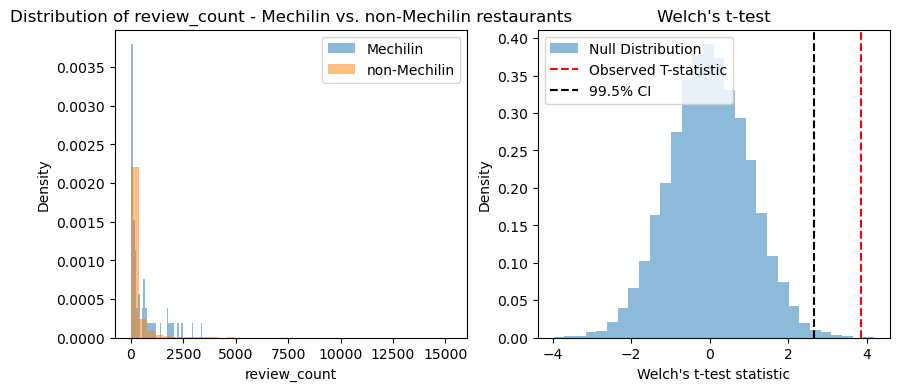

In [53]:
welch_ttest(df_final, 'review_count')

According to the significance testing, we reject null hypothesis becuase p-value = 0.00028657247136304746 < 0.005. That is, we can conclude that the sample means are different in two groups, or we say the distribution of reviews count for two groups, “Mechilin Restaurants” and “Non-Mechilin Restaurants” are significantly having difference under alpha level 0.005. The Mechelin reviews counts are higher than the Non-Mechelin ones.

#### b) ratings

In [44]:
check_var(df_final, 'rating')

,count,mean,var
Mechelin,62,4.314516,0.108474
non-Mechelin,10815,3.634027,0.823468


Test result TtestResult(statistic=15.925875747893057, pvalue=2.2771726135867452e-24, df=66.4242089910516)


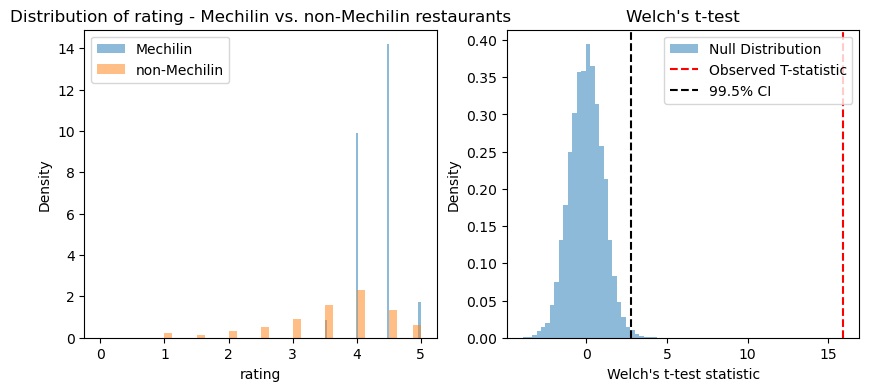

In [45]:
welch_ttest(df_final, 'rating')

Since the p-values is close to zero, Mechelin restaurants are significantly having higher ratings. (Yea for sure)

#### c) elite_reviews_perc

the percentage of elite reviews over total reviews we scraped

In [56]:
check_var(df_final, 'elite_reviews_perc')

,count,mean,var
Mechelin,62,0.584875,0.044132
non-Mechelin,10815,0.308828,0.065534


Test result TtestResult(statistic=10.302894585630202, pvalue=4.613807041670306e-15, df=62.042961299334955)


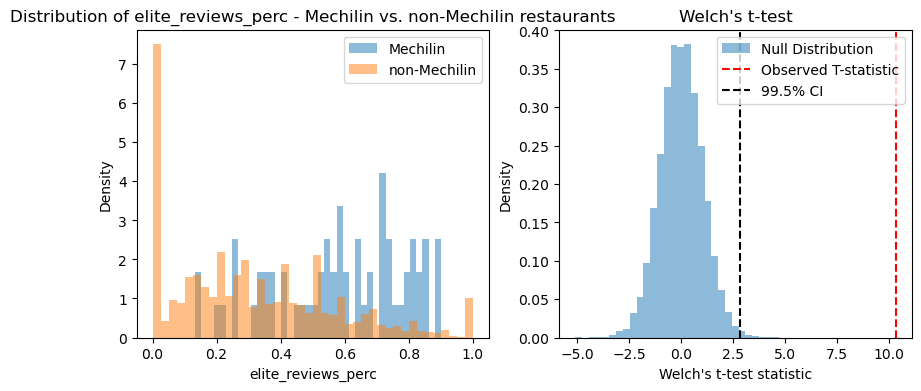

In [58]:
welch_ttest(df_final, 'elite_reviews_perc')

It also significantly shows that the Mechelin restaurants has much higher rate of elite reviews among all reviews. On average, for Mechelin restaurant, 58.5% of reviews come from the elite reviewers, indicating that they get a lot more top-notch reviews compared to non-Mechelin ones (which get 30.9% of elite reviews).

#### d) user_photo_cnt_avg

In [153]:
check_var(df_final, 'user_photo_cnt_avg')

,count,mean,var
Mechelin,62,1211.676287,1.057543e+06
non-Mechelin,10815,1103.560501,1.706112e+07


Test result TtestResult(statistic=0.792005090151361, pvalue=0.43093085217367355, df=72.80151152591043)


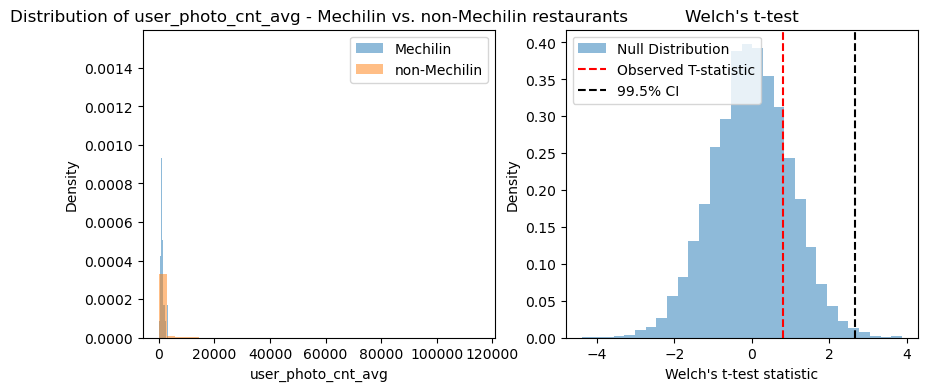

In [154]:
welch_ttest(df_final, 'user_photo_cnt_avg')

No difference in user photo count.

#### e) user_review_cnt_avg

In [155]:
check_var(df_final, 'user_review_cnt_avg')

,count,mean,var
Mechelin,62,301.153484,12220.944057
non-Mechelin,10815,256.576959,148090.995627


Test result TtestResult(statistic=3.0701927064703325, pvalue=0.0030472475476817826, df=69.76765981567063)


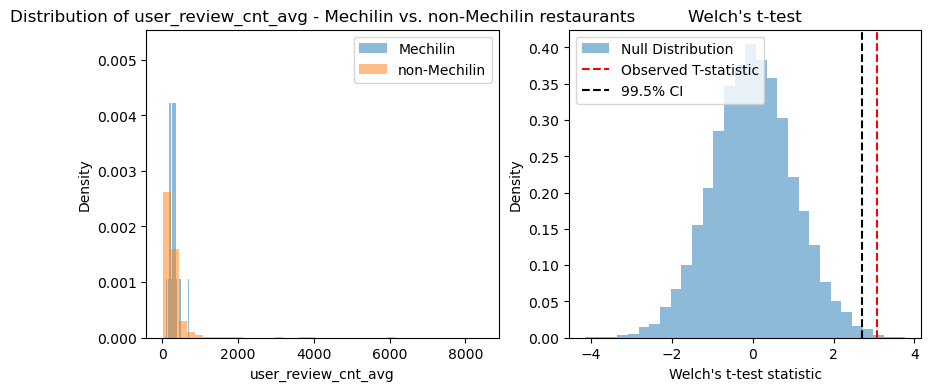

In [156]:
welch_ttest(df_final, 'user_review_cnt_avg')

Michelin restaurants' user_review_cnt_avg are significantlty higher than Non-Michelin Restaurants.

#### f) rating_avg & rating_med

In [158]:
check_var(df_final, 'rating_avg')

,count,mean,var
Mechelin,62,4.378020,0.088648
non-Mechelin,10815,3.664003,0.811056


Test result TtestResult(statistic=18.40640054712258, pvalue=5.01877702779785e-28, df=67.56568959646648)


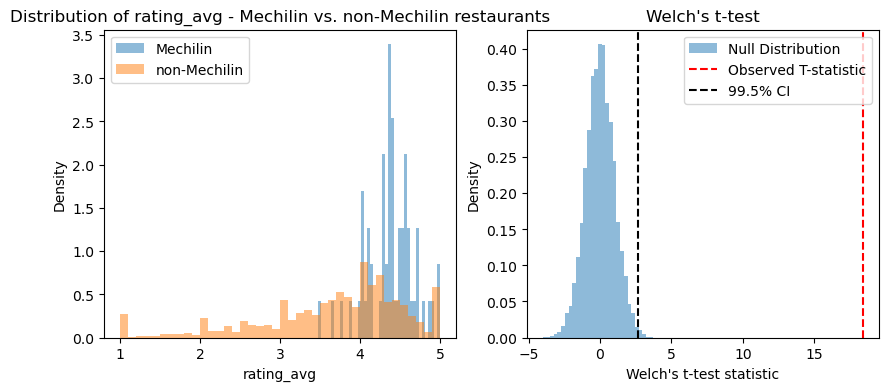

In [159]:
welch_ttest(df_final, 'rating_avg')

In [161]:
check_var(df_final, 'rating_med')

,count,mean,var
Mechelin,62,4.838710,0.137493
non-Mechelin,10815,3.897457,1.357849


Test result TtestResult(statistic=19.44475949077188, pvalue=1.6616294656581077e-29, df=68.10137558004273)


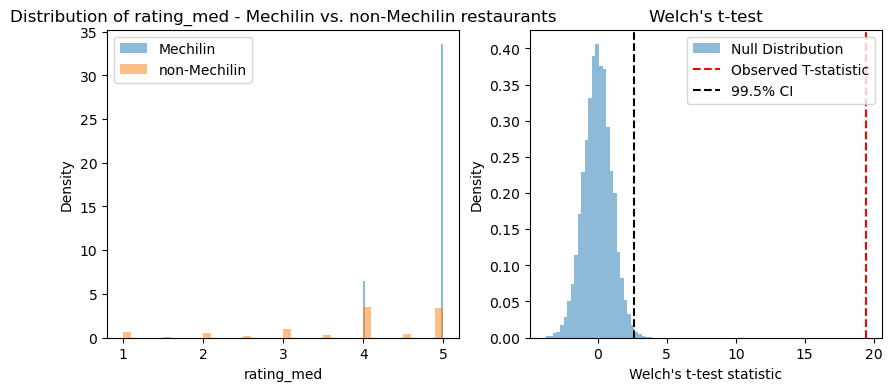

In [160]:
welch_ttest(df_final, 'rating_med')

#### g) rating_std

In [162]:
check_var(df_final, 'rating_std')

,count,mean,var
Mechelin,62,0.944166,0.101951
non-Mechelin,9812,1.215208,0.198457


In [166]:
sum(df_final['rating_std'].isna())

1003

Test result TtestResult(statistic=-6.643275833783611, pvalue=8.592197634763945e-09, df=62.50977770379272)


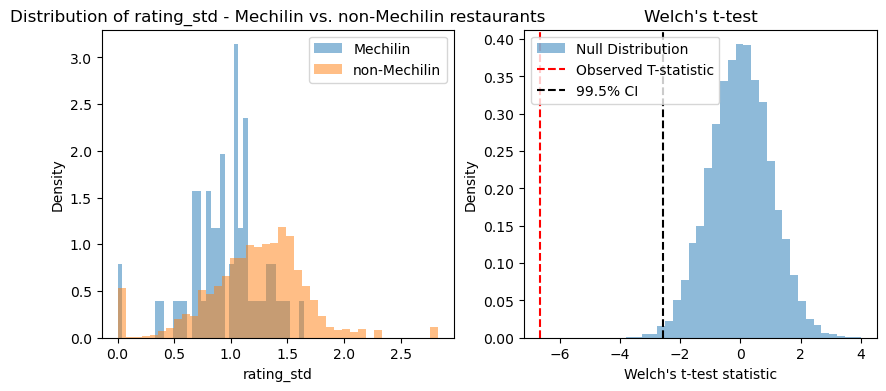

In [170]:
welch_ttest(df_final[~df_final['rating_std'].isna()], 'rating_std', mode='left')

### 2 Bar & Pie Charts
#### a) price

In [136]:
df_price = df_final.groupby(['is_michelin', 'price']).size().reset_index(name = 'count')
# new_row = {'is_michelin': 1, 'count': 0, 'price': '$'}
# df_price = df_price.append(new_row, ignore_index=True)
price_mapping = {'$': r'\$', '$$': r'\$\$', '$$$': r'\$\$\$', '$$$$': r'\$\$\$\$'}
df_price['price'] = df_price['price'].map(price_mapping)
df_price

,is_michelin,price,count
0,0,\$,2033
1,0,\$\$,3517
2,0,\$\$\$,706
3,0,\$\$\$\$,222
4,1,\$\$,1
5,1,\$\$\$,3
6,1,\$\$\$\$,45


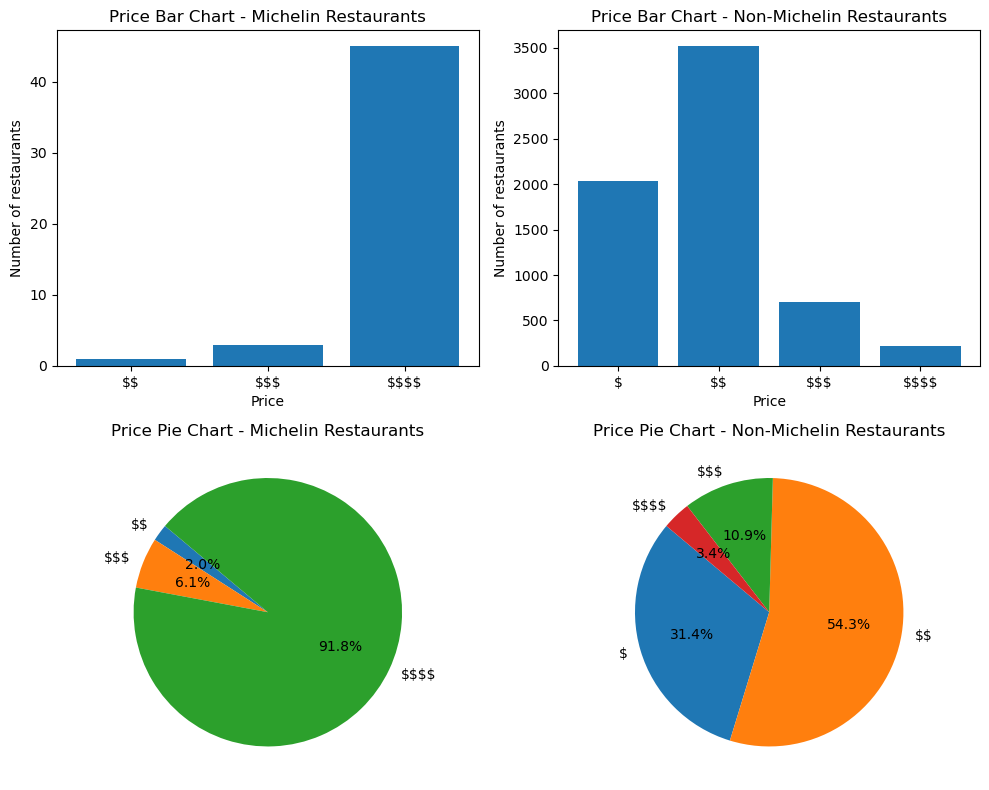

In [152]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.title("Price Bar Chart - Michelin Restaurants")
plt.bar(df_price[df_price['is_michelin']==1]['price'], df_price[df_price['is_michelin']==1]['count'])
plt.xlabel("Price")
plt.ylabel("Number of restaurants")

plt.subplot(2,2,2)
plt.title("Price Bar Chart - Non-Michelin Restaurants")
plt.bar(df_price[df_price['is_michelin']==0]['price'], df_price[df_price['is_michelin']==0]['count'])
plt.xlabel("Price")
plt.ylabel("Number of restaurants")

plt.subplot(2,2,3)
plt.title("Price Pie Chart - Michelin Restaurants")
plt.pie(df_price[df_price['is_michelin']==1]['count'], labels= df_price[df_price['is_michelin']==1]['price'], autopct='%1.1f%%', startangle=140)

plt.subplot(2,2,4)
plt.title("Price Pie Chart - Non-Michelin Restaurants")
plt.pie(df_price[df_price['is_michelin']==0]['count'], labels= df_price[df_price['is_michelin']==0]['price'], autopct='%1.1f%%', startangle=140)

plt.tight_layout()
plt.show()